In [1]:
import cv2
import matplotlib.pyplot as plt
def show_img_np(img, max_h=3, max_w=20, save=False, cmap='gray'):
    """
    :param np_array: input image, one channel or 3 channel,
    :param save: if save image
    :param size:
    :return:
    """
    if len(img.shape) < 3:
        plt.rcParams['image.cmap'] = cmap
    plt.figure(figsize=(max_w, max_h), facecolor='w', edgecolor='k')
    plt.imshow(img)
    if save:
        cv2.imwrite('debug.png', img)
    else:
        plt.show()

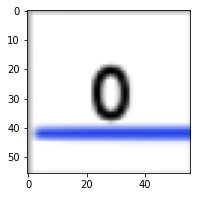

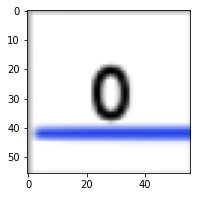

(36, 4, 4, 56, 56, 3)


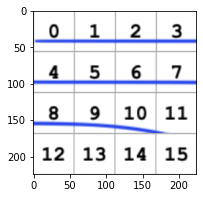

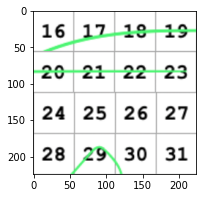

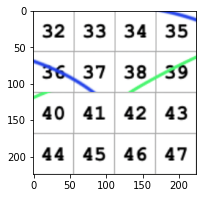

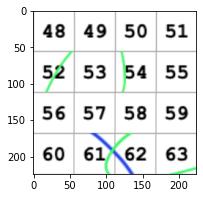

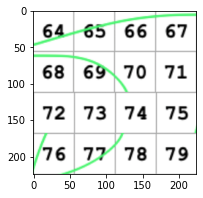

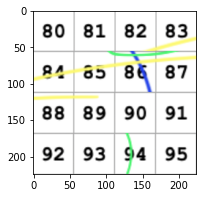

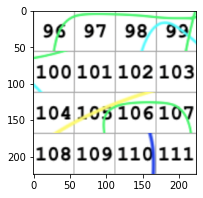

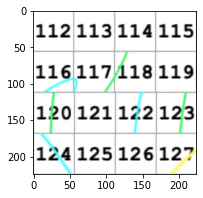

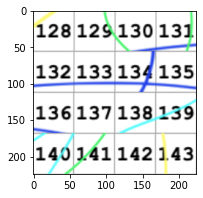

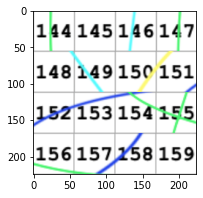

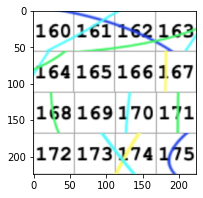

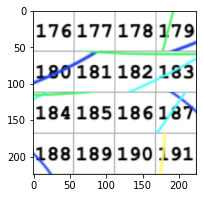

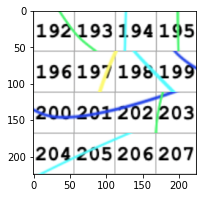

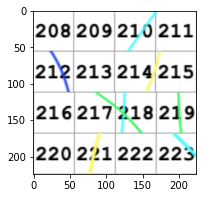

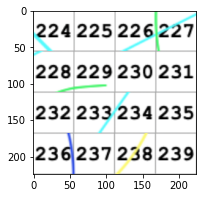

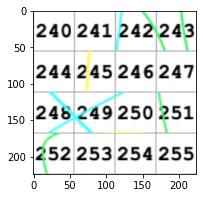

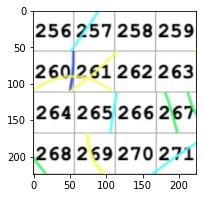

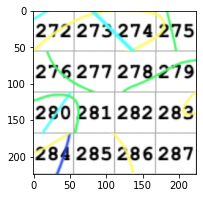

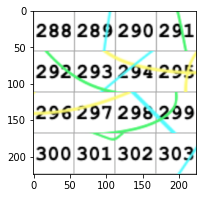

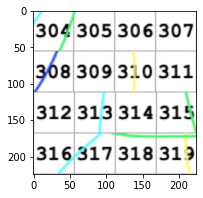

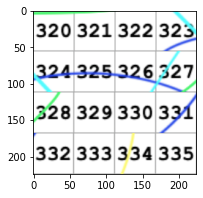

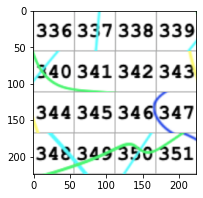

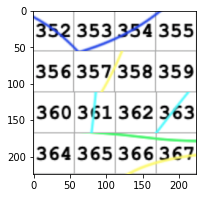

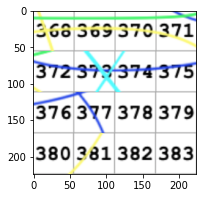

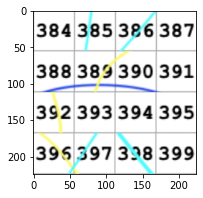

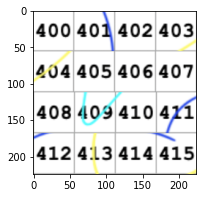

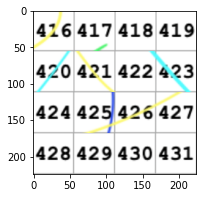

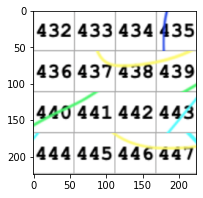

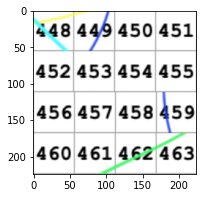

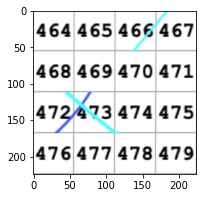

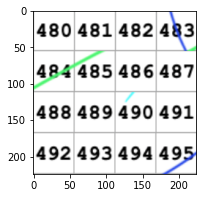

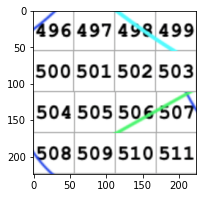

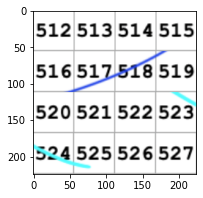

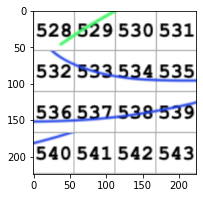

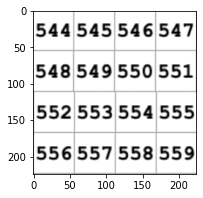

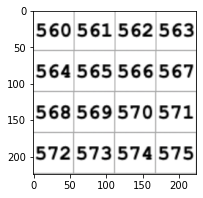

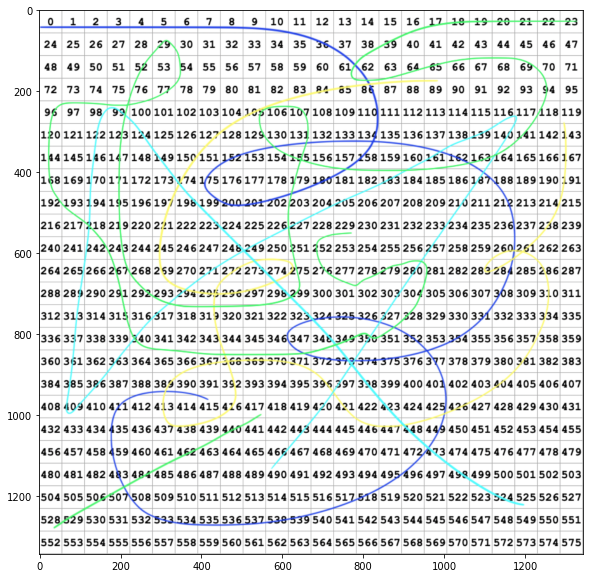

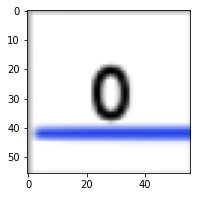

In [61]:
import cv2
img = cv2.imread("numbers.png")
img = cv2.resize(img,(224*6,224*6))

def subtile_img(img,frame_size=(224,224),tile_size=(56,56)):
    h_i,w_i,c_i = img.shape
    h_f,w_f,c_f = frame_size[0],frame_size[1],c_i
    h_t,w_t,c_t = tile_size[0],tile_size[1],c_i
    if (h_i%h_f)*(h_f%h_t)*(w_i%w_f)*(w_f%w_t)!= 0:
        raise ValueError("tile size not divideable")

    img = img.reshape(h_i//h_t,h_t,w_i//w_t,w_t,c_t) # img 0000 #1
    show_img_np(img[0,:,0,:,:])
    img = img.swapaxes(1, 2)
    # tile into ultimate form
    img = img.reshape(h_i//h_f,
                      h_f//h_t,
                      w_i//w_f,
                      w_f//w_t,
                      h_t,w_t,c_t)
    show_img_np(img[0,0,0,0])
    # combine into series of tiles
    img = img.reshape((h_i//h_f)*(h_i//h_f),
                      h_f//h_t,
                      w_f//w_t,
                      h_t,w_t,c_t)
    print(img.shape)
    # combine into frames
    img = img.swapaxes(2,3)
    img = img.reshape((h_i//h_f)*(h_i//h_f),h_f,w_f,c_t)



    for i in range(img.shape[0]):
        show_img_np(img[i])


def subtile_img(img,frame_size=(224,224),tile_size=(56,56)):
    h_i,w_i,c_i = img.shape
    h_f,w_f,c_f = frame_size[0],frame_size[1],c_i
    h_t,w_t,c_t = tile_size[0],tile_size[1],c_i
    if (h_i%h_f)*(h_f%h_t)*(w_i%w_f)*(w_f%w_t)!= 0:
        raise ValueError("tile size not divideable")

    img = img.reshape(h_i//h_t,h_t,w_i//w_t,w_t,c_t).swapaxes(1, 2)
    img = img.reshape(h_i//h_f, h_f//h_t, w_i//w_f, w_f//w_t, h_t,w_t,c_t)
    img = img.reshape((h_i//h_f)*(h_i//h_f),h_f//h_t,w_f//w_t,h_t,w_t,c_t).swapaxes(2,3)
    img = img.reshape((h_i//h_f)*(h_i//h_f),h_f,w_f,c_t)

    for i in range(img.shape[0]):
        show_img_np(img[i])

    
    
subtile_img(img)
show_img_np(img,10)
show_img_np(img[:56,:56,:])
        